# Introduction to Scikit-Learn (sklearn)

What we're going to cover:

0. An end-to-end scikit-learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

## 0. An end-to-end Scikit-Learn workflow

In [1]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# create x (features matrix)
x = heart_disease.drop("target", axis=1)

# create y (labels)
y = heart_disease["target"]

In [3]:
# ignore warning because newer version in the future
# ignore, default
import warnings
warnings.filterwarnings("ignore")

In [4]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
clf.fit(x_train, y_train);

In [7]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3


In [8]:
import sklearn
sklearn.show_versions()


System:
    python: 3.10.4 | packaged by conda-forge | (main, Mar 30 2022, 08:38:02) [MSC v.1916 64 bit (AMD64)]
executable: c:\ml-courses-pratice\env\python.exe
   machine: Windows-10-10.0.22621-SP0

Python dependencies:
      sklearn: 1.1.1
          pip: 22.1.2
   setuptools: 61.2.0
        numpy: 1.23.1
        scipy: 1.9.1
       Cython: None
       pandas: 1.4.3
   matplotlib: 3.5.1
       joblib: 1.1.0
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: C:\ml-courses-pratice\env\Library\bin\mkl_rt.1.dll
         prefix: mkl_rt
       user_api: blas
   internal_api: mkl
        version: 2021.4-Product
    num_threads: 4
threading_layer: intel

       filepath: C:\ml-courses-pratice\env\vcomp140.dll
         prefix: vcomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 8


In [9]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
207,60,0,0,150,258,0,0,157,0,2.6,1,2,3
80,41,1,2,112,250,0,1,179,0,0.0,2,0,2
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2


In [10]:
y_preds = clf.predict(x_test)
y_preds

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [11]:
y_test

296    0
69     1
207    0
80     1
151    1
      ..
192    0
250    0
26     1
88     1
44     1
Name: target, Length: 61, dtype: int64

In [12]:
# 4. evaluate the model on the traning data and test data
clf.score(x_train, y_train)

1.0

In [13]:
clf.score(x_test,y_test)

0.7540983606557377

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.61      0.69        28
           1       0.72      0.88      0.79        33

    accuracy                           0.75        61
   macro avg       0.77      0.74      0.74        61
weighted avg       0.76      0.75      0.75        61



In [15]:
confusion_matrix(y_test, y_preds)

array([[17, 11],
       [ 4, 29]], dtype=int64)

In [16]:
accuracy_score(y_test, y_preds)

0.7540983606557377

In [17]:
# 5. Improve a model
# try different amount of n_estimators
import numpy as np
np.random.seed(42)
for i in range(10,100,10):
    print(f"trying model with {i} estimators...");
    clf =RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%");
    print("");

trying model with 10 estimators...
Model accuracy on test set: 72.13%

trying model with 20 estimators...
Model accuracy on test set: 77.05%

trying model with 30 estimators...
Model accuracy on test set: 73.77%

trying model with 40 estimators...
Model accuracy on test set: 73.77%

trying model with 50 estimators...
Model accuracy on test set: 75.41%

trying model with 60 estimators...
Model accuracy on test set: 73.77%

trying model with 70 estimators...
Model accuracy on test set: 75.41%

trying model with 80 estimators...
Model accuracy on test set: 75.41%

trying model with 90 estimators...
Model accuracy on test set: 77.05%



In [18]:
# 6. Save a model and load it
# wb: write binary
import pickle
pickle.dump(clf, open("random_forst_model_1.pkl","wb"))

In [19]:
# rb: read binary
loaded_model = pickle.load(open("random_forst_model_1.pkl","rb"))
loaded_model.score(x_test, y_test)

0.7704918032786885

In [20]:
# let's listify the contents
what_were_covering = [

"0. An end-to-end scikit-learn workflow",
"1. Getting the data ready",
"2. Choose the right estimator/algorithm for our problems",
"3. Fit the model/algorithm and use it to make predictions on our data",
"4. Evaluating a model",
"5. Improve a model",
"6. Save and load a trained model",
"7. Putting it all together!"]

In [21]:
what_were_covering

['0. An end-to-end scikit-learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

In [22]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

## 1. Getting data ready to be used with machine learning
# 3 main things we have to do:
    1. Split the data into features and labels (usually x & y)
    2. Filling (also called inputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [23]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
x = heart_disease.drop("target", axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [25]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [26]:
# Split the data into training and test sets
# test_size =0.2 -> we want our test data set to be 20% of the overall data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [27]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [28]:
x.shape[0] * 0.8

242.4

In [29]:
len(heart_disease)

303

### 1.1 Make sure it's all numerical

In [30]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [31]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [32]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [33]:
# Split into x/y
x = car_sales.drop("Price", axis=1)
y=car_sales["Price"]

# SPlit into training and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [34]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 cat_features)],
                               remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [35]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [36]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [37]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [38]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


### 1.2 What if there were missing values?

1. Fill them with some values (also known as imputation).
2. Remove the samples with missing data altogether


In [39]:
# import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [40]:
# how many missing data
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [41]:
# create x and y
x = car_sales_missing.drop("Price", axis=1)
y=car_sales_missing["Price"];

In [42]:
# try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 cat_features)],
                               remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [43]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### option 1: Fill missing data with Pandas

In [44]:
# Fill the "make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the Colour column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the Odometer (KM) column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

# Fill the Doors column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [45]:
# check dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [46]:
# remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [47]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [48]:
len(car_sales_missing)

950

In [49]:
x = car_sales_missing.drop("Price", axis =1)
y = car_sales_missing["Price"]

In [50]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 cat_features)],
                               remainder="passthrough")
transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

## Option 2: Fill missing values with Scikit learn

In [51]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [52]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [53]:
# drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [54]:
# Split into x and y
x = car_sales_missing.drop("Price", axis=1)
y=car_sales_missing["Price"]

In [55]:
# Fill missing values with Scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer =SimpleImputer(strategy="constant",  fill_value="missing")
door_imputer =SimpleImputer(strategy="constant",  fill_value=4)
num_imputer =SimpleImputer(strategy="mean")

# define columns
cat_features=["Make", "Colour"]
door_features = ["Doors"]
num_features =["Odometer (KM)"]

# create an input (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [56]:
car_sales_filled = pd.DataFrame(filled_x,
                               columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [57]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [58]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 cat_features)],
                               remainder="passthrough")
transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [59]:
# Now we've got data as numbers and filled (no missing values)
# fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.21990196728583944

In [60]:
len(car_sales_filled), len(car_sales)

(950, 1000)

In [61]:
what_were_covering

['0. An end-to-end scikit-learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 2. Choosing the right estimators/algorithm for your problem

Somethings to note:
    <ul><li> Sklearn refers to machine learning models, algorithm as estimators</li>
    <li>Classification problem - predicting a category (heart disease or not)
        <ul><li>Sometimes youll see 'clf' (classifier) used as a classification estimator</li></ul></li>
    <li>Regression problem - Predicting a number (selling price of a car)</li></ul>

### 2.1 Picking a machine learning model for a regression problem

 Let's use Boston house dataset
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html



In [62]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing =fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [63]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [64]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [65]:
# import algorithm
from sklearn.linear_model import Ridge

# set up random seed
np.random.seed(42)

# create the data
x = housing_df.drop("target", axis=1)
y=housing_df["target"] # median house price in $100,000s

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

# instanciate and fit the model ( on the training set)
model = Ridge()
model.fit(x_train, y_train)

# check the score of the model (on the test set)
model.score(x_test, y_test)

0.5758549611440126

What if Ridge didn't work or score didn't fit our needs?
=> try a different mode
how about we try an ensemble model

In [66]:
# import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(42)

# create the data
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

# create random forest model
model = RandomForestRegressor()
model.fit(x_train, y_train)

# check the score of the model (on the test set)
model.score(x_test, y_test)

0.8065734772187598

## 2.2 picking a machine learning model for a classification problem

In [67]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# consulting the map and it says to try LinearSVC

In [68]:
# import the linearSVC estimator class
from sklearn.svm import LinearSVC

# setup random seed
np.random.seed(42)

# make the data
x = heart_disease.drop("target", axis=1)
y=heart_disease["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

# instantiate LinearSVC
clf = LinearSVC()
clf.fit(x_train, y_train)

# Evaluate the LinearSVC
clf.score(x_test, y_test)

0.8688524590163934

In [69]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [70]:
# import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# make the data
x = heart_disease.drop("target", axis=1)
y=heart_disease["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

# instantiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Evaluate the RandomForestClassifier
clf.score(x_test, y_test)

0.8524590163934426

Tidbit:
    1. if you have structured data, used ensemble data
    2. if you have unstructured data, used deep learning or tranfer learning

In [71]:
what_were_covering

['0. An end-to-end scikit-learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 3. Fit the model/algorithm and use it to make predictions on our data

## 3.1 Fitting the model to the data

Different name for:
<br>x=features, features variables, data
<br>y=labels, targets, target variables

In [72]:
# import the linearSVC estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# make the data
x = heart_disease.drop("target", axis=1)
y=heart_disease["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

# instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(x_train, y_train)

# Evaluate the RandomForestClassifier (use the pattern the model has learnt)
clf.score(x_test, y_test)

0.8524590163934426

### 3.2 Make predictions using a machine learning model

2 ways to make predictions
<br>1. predict()
<br>2. predict_proba()

In [73]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [74]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [75]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [76]:
# Compare predictions to truth labels to evaluate the model
y_preds =clf.predict(x_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [77]:
clf.score(x_test, y_test)

0.8524590163934426

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

# Make predictions with predict_proba()


In [79]:
# predict_proba() returns probabilities of a classification label 
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

0.89+.011<br>
0.49+0.51...

In [80]:
x_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [81]:
# let's predict() on the same data
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [82]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

predict() can also be used for regression models

In [83]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [84]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# create the data
x=housing_df.drop("target", axis=1)
y=housing_df["target"]

# split into training and test sets
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

# create model instance
model=RandomForestRegressor()

# fit the model to the data
model.fit(x_train, y_train)

# Make predictions
y_preds=model.predict(x_test)

In [85]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [86]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [87]:
# compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

In [88]:
len(y_preds)

4128

In [89]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [90]:
what_were_covering

['0. An end-to-end scikit-learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 4. Evaluating a machine learning model

3 ways to evaluate scikit-learn models/estimators:<br>
1. estimator's build-in 'score' method<br>
2. the 'scoring' parameter<br>
3. problem-specific metric functions<br>

### 4.1 Evaluating a model with the 'score' method

In [91]:
# import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# make the data
x = heart_disease.drop("target", axis=1)
y=heart_disease["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

# instantiate RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data (training the machine learning model)
clf.fit(x_train, y_train)

# Evaluate the RandomForestClassifier (use the pattern the model has learnt)4
# the highest value for .score() method is 1.-, the lowest is 0.0
# 1.0 = 100%
# why is our model getting 1.0 on the training data?
# => because it's had exposure to all of the training features and all of the training labels
clf.score(x_train, y_train)

1.0

In [92]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [93]:
clf.score(x_test, y_test)

0.8524590163934426

In [94]:
clf.score(x_train, y_train)

1.0

In [95]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# create the data
x=housing_df.drop("target", axis=1)
y=housing_df["target"]

# split into training and test sets
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

# create model instance
model=RandomForestRegressor(n_estimators=10)

# fit the model to the data
model.fit(x_train, y_train)


RandomForestRegressor(n_estimators=10)

In [96]:
# the default score() avaluation matric is r_squared for regression algorithms
# higherst =1.0, lowest=0.0
model.score(x_test, y_test)

0.7869919586520553

In [97]:
model.score(x_train, y_train)

0.9626597968483063

In [98]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 4.2 Evaluating a model using 'scoring' parameter

In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# create the data
x=housing_df.drop("target", axis=1)
y=housing_df["target"]

# split into training and test sets
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

# create model instance
clf=RandomForestRegressor(n_estimators=100)

# fit the model to the data
clf.fit(x_train, y_train)

RandomForestRegressor()

In [100]:
clf.score(x_test, y_test)

0.8065734772187598

In [101]:
cross_val_score(clf, x, y, cv=5)

array([0.50097272, 0.70273041, 0.74115332, 0.61556377, 0.68253631])

In [102]:
cross_val_score(clf, x, y, cv=10)

array([0.26114812, 0.67648127, 0.72331903, 0.69042179, 0.76894696,
       0.69914331, 0.51238628, 0.60491806, 0.48685273, 0.69897166])

In [103]:
np.random.seed(42)

# signle training and test split score
clf_signle_score = clf.score(x_test, y_test)

# take the mean of 5-fold cross-validation score
clf_signle_val_score = np.mean(cross_val_score(clf, x, y, cv=5))

# compare the two
clf_signle_score, clf_signle_val_score

(0.8065734772187598, 0.6520824166120266)

In [104]:
# default scoring parameter of classifier = mean accuracy
# clf.score()

In [105]:
# scoring parameter set to None by default
cross_val_score(clf, x, y, cv=5, scoring=None)


array([0.52250197, 0.70039599, 0.74071892, 0.61721416, 0.6779728 ])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area uder ROC curve
3. Confusion matrix
4. Classification report

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier(n_estimators=100)
cross_val_score= cross_val_score(clf, x, y, cv=5)
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [107]:
np.mean(cross_val_score)

0.8248087431693989

In [108]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}%")


Heart Disease Classifier Cross-Validated Accuracy: 82.48%


** Area under the receiver operating charatertistic curve (AUC/ROC) **
* Area under curve (AUC)
* ROC curve

** ROC curve: a comparision of a model's true positive rate (tpr) versus a models false positive rate (fpr)
* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [109]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [110]:
from sklearn.metrics import roc_curve
# fit the classifier
clf.fit(x_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(x_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [111]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [112]:
# calculate fpr, tpr, and thresholds
fpr, tpr, thresholds =roc_curve(y_test, y_probs_positive)

# check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

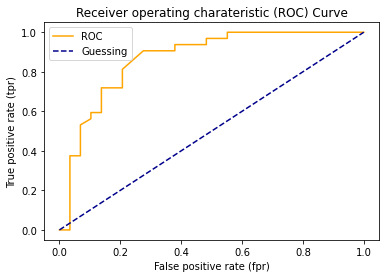

In [113]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curce given the false positive rate (fpr)
    and tru positive rate (tpr) of a model.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    # plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label ="Guessing")
    
    # customize the plt
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver operating charateristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [114]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

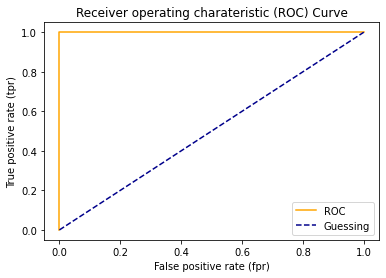

In [115]:
# Plot perfect rOC curve and AUC score
fpr, tpr, thresholds =roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [116]:
# perfect AUC score
roc_auc_score(y_test, y_test)

1.0

### Confusion matrix

** Confusion matric

a confusion matric is a quick way to compare the labels a model predicts and the actual label
it was supposed to predict.
In essence, giving you an idea of where the model is getting confused

In [117]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(x_test)
confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [118]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual labels"],
           colnames=["Predicted labels"])

Predicted labels,0,1
Actual labels,,
0,23,6
1,6,26


In [119]:
23+6+6+26

61

In [120]:
len(y_preds)

61

### Creating a confusion matric using Scikit Learn
To use the new methods of creating a confusion matrix with Sckit-learn, you will need sklearn vesion 

In [121]:
import sklearn
sklearn.__version__

'1.1.1'

In [122]:
clf

RandomForestClassifier()

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, x_test, y_preds)

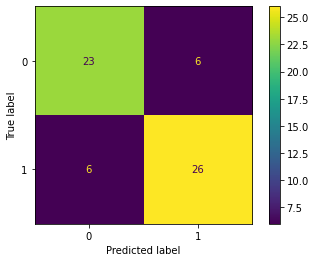

In [123]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=y_preds)


### how to install a conda package into the current enviroment from jupyter notebook
import sys<br>
!conda install --yes --prefix {sys.prefix} seaborn

<AxesSubplot:>

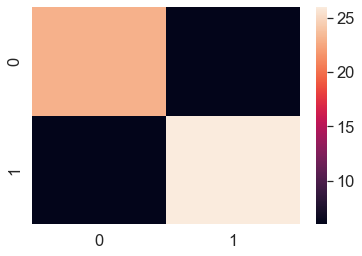

In [124]:
# make our confusion matrix more visual with Seaborn's heamap()
import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

# plot it using seaborn
sns.heatmap(conf_mat)

### Classification report

In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [126]:
# where precision and recall become valuable
disease_true =np.zeros(10000)
disease_true[0]=1 # only 1 positive case

disease_preds=np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2 regression model evaluation metrics



the ones we're going to cover are:
1. R^2 or cefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

* R^2<br>
What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative ifinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectlt predicts a range of numbers, it's R^2 value would be 1.

In [127]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

x=housing_df.drop("target", axis=1)
y=housing_df["target"]

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)


RandomForestRegressor()

In [128]:
model.score(x_test, y_test)

0.8065734772187598

In [129]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [130]:
y_test.mean()

2.0550030959302275

In [131]:
from sklearn.metrics import r2_score
# fill an array with y_test mean
y_test_mean=np.full(len(y_test),y_test.mean())
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [132]:
r2_score(y_true=y_test,
        y_pred=y_test_mean)

0.0

In [133]:
r2_score(y_true=y_test,
        y_pred=y_test)


1.0

**Mean absolute error (MAE)**<br>
MAE is the average of the absolute differences between predictions and actual values.
It gives you an idea of how wrong your models predictions are

In [134]:
# MAE
from sklearn.metrics import mean_absolute_error
y_preds=model.predict(x_test)
mae=mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [135]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [136]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [137]:
df = pd.DataFrame(data={"actual values": y_test,
                       "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [138]:
# MAE using formualas and difference
np.abs(df["differences"]).mean()

0.32659871732073803

**Mean squred error (MSE)**<br>
MSE is the mean of the square of the errors between actual and pedicted values

In [139]:
# mean squred error (MSE)
from sklearn.metrics import mean_squared_error
y_preds =model.predict(x_test)
mse=mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [140]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [141]:
# calculate mse by hand
squared=np.square(df["differences"])
squared.mean()

0.25346785208245565

In [142]:
df_large_error=df.copy()
df_large_error.iloc[0]["squared_differences"]=16
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [143]:
# calculate MSE with large error
df_large_error["squared_differences"].mean()

0.2573437523766417

In [144]:
df_large_error.iloc[1:100]=20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [145]:
df_large_error["squared_differences"].mean()

0.733418071208813

### 4.2.3 Finally using the 'scoring' parameter

In [146]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier(n_estimators=100)

In [147]:
np.random.seed(42)

# Cross=validation accuracy
cv_acc=cross_val_score(clf, x, y, cv=5, scoring=None)
# if scoring is none, estimator's default scoring evaluation metric is used (accuracy
# for classification models)

cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [148]:
# cross vaidated accuracy
print(f"The cross-vaidated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-vaidated accuracy is: 82.48%


In [149]:
# Precision 
np.random.seed(42)
cv_precision=cross_val_score(clf, x, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [150]:
# cross vaidated precision
print(f"The cross-vaidated precision is: {np.mean(cv_precision)*100:.2f}%")

The cross-vaidated precision is: 83.30%


In [151]:
# recall
cv_recall=cross_val_score(clf, x, y, cv=5, scoring="recall")
cv_recall

array([0.87878788, 0.84848485, 0.78787879, 0.81818182, 0.87878788])

In [152]:
# cross vaidated recall
print(f"The cross-vaidated recall is: {np.mean(cv_recall)*100:.2f}%")

The cross-vaidated recall is: 84.24%


In [153]:
# let's see the 'scoring' parameter being using for a regression problem

In [154]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=housing_df.drop("target", axis=1)
y=housing_df["target"]
model=RandomForestRegressor(n_estimators=100)

In [155]:
np.random.seed(42)
cv_r2=cross_val_score(model, x, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6545458023124507

In [156]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [157]:
# mean square error
cv_mse=cross_val_score(model, x, y, cv=3, scoring="neg_mean_squared_error")
np.mean(cv_mse)


-0.4626304189468596

In [158]:
cv_mse

array([-0.51816064, -0.33163551, -0.53809511])

In [159]:
# Mean absolute error
cv_mae=cross_val_score(model, x, y, cv=3, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4820330437306202

In [160]:
cv_mae

array([-0.5173712 , -0.4219676 , -0.50676033])

## 4.3 Using different evaluation metrics as Scikit=learn function

The 3rd way to evaluate scikit-learn models/estimators is to using the 'sklearn.metrics' module

In [161]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# create x & y
x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# create model
clf=RandomForestClassifier()

# fit model
clf.fit(x_train, y_train)

# make predictions
y_preds=clf.predict(x_test)

# evaluate model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)*100:.2f}%")
print(f"Recall: {recall_score(y_test, y_preds)*100:.2f}%")
print(f"F1: {f1_score(y_test, y_preds)*100:.2f}%")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1: 86.15%


In [162]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# create x & y
x=housing_df.drop("target", axis=1)
y=housing_df["target"]

# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# create model
model=RandomForestRegressor()

# fit model
model.fit(x_train, y_train)

# make predictions
y_preds=model.predict(x_test)

# evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)*100:.2f}%")
print(f"MAE score: {mean_absolute_error(y_test, y_preds)*100:.2f}%")
print(f"MSE score: {mean_squared_error(y_test, y_preds)*100:.2f}%")

Regression metrics on the test set
R2 score: 80.66%
MAE score: 32.66%
MSE score: 25.35%


In [163]:
what_were_covering

['0. An end-to-end scikit-learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 5. Improving a model

* 1st predictions = baseline predictions
* 1st model = baseline model

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Parameters vs Hyperparameters
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

3 ways to adjust hyperparameters:
* By hand
* Randomly with RandomSearchCV
* Exhaustively with GridSearchCV

In [164]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.get_params() 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training, validation and test

In [165]:
clf.get_params() 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

we're going to try and adjust:
* max-depth
* max_features
* min_samples_leaf
* min_samples_splits
* n_estimators

In [166]:
def evaluate_preds(y_true, y_preds):
    """
    Perform evaluation comparision on y_true labels vs y_preds labels
    on a classification
    """
    accuracy=accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metrict_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy*100:.2f}")
    print(f"precision: {precision*100:.2f}")
    print(f"recall: {recall*100:.2f}")
    print(f"f1: {f1*100:.2f}")
    
    return metrict_dict

In [167]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# split into x and y
x= heart_disease_shuffled.drop("target", axis=1)
y=heart_disease_shuffled["target"]

# split the data into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15*len(heart_disease_shuffled)) # 15% of data
x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[:valid_split]

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Make basline predictions
y_preds = clf.predict(x_valid)

# evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22
precision: 81.48
recall: 88.00
f1: 84.62


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [168]:
np.random.seed(42)

# create a 2nd classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(x_train, y_train)

# Make predictions with different hyperparameters
y_preds2 = clf_2.predict(x_valid)

# evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds2)

Acc: 82.22
precision: 84.00
recall: 84.00
f1: 84.00


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [169]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 2000],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [2, 4, 6],
       "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into x and y
x = heart_disease_shuffled.drop("target", axis=1)
y=heart_disease_shuffled["target"]

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf=RandomForestClassifier(n_jobs=1)

# fit model
model.fit(x_train, y_train)

# set up RandomizedSearchCV (cross-validation)
rs_clf=RandomizedSearchCV(estimator=clf,
                         param_distributions=grid,
                         n_iter=10, # number of model to try
                         cv=5,
                         verbose=2)

# fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   2.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   2.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estima

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 2000]},
                   verbose=2)

In [170]:
rs_clf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 30}

In [171]:
# make predictions with the best hyperparameters
rs_y_preds=rs_clf.predict(x_test)

# evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 83.61
precision: 78.12
recall: 89.29
f1: 83.33


### 5.3 Hyperpameter tuning with GridSearchCV

In [172]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 2000],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [173]:
grid_2 = {'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

In [174]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into x and y
x = heart_disease_shuffled.drop("target", axis=1)
y=heart_disease_shuffled["target"]

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf=RandomForestClassifier(n_jobs=1)

# fit model
model.fit(x_train, y_train)

# set up GridSearchCV
gs_clf=GridSearchCV(estimator=clf,
                         param_grid=grid_2,
                         cv=5,
                         verbose=2)

# fit the GridSearchCV version of clf
gs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [175]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 500}

In [176]:
gs_y_preds = gs_clf.predict(x_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 83.61
precision: 78.12
recall: 89.29
f1: 83.33


<AxesSubplot:>

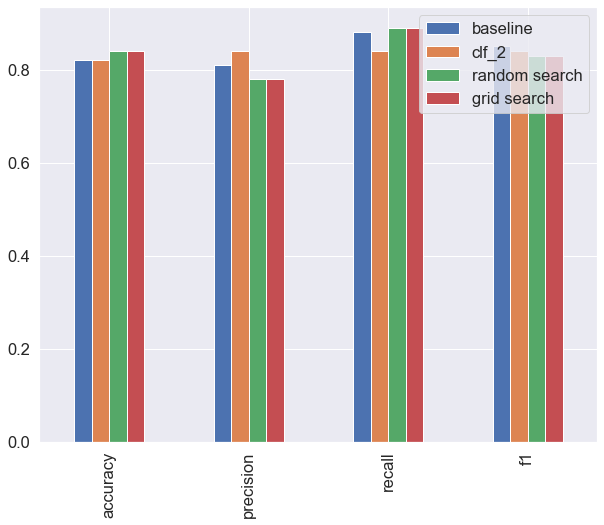

In [177]:
# let's compare our different models metrics

compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                              "clf_2":clf_2_metrics,
                              "random search": rs_metrics,
                              "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10,8))

## 6. Saving and loading trained machine learning model

2 ways to save and load machine learning models:
1. With Python's 'pickle' module
2. with the joblib module

### Pickle

In [178]:
import pickle

# save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model.pkl","wb"))

In [179]:
# load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model.pkl","rb"))

In [180]:
# make some predictions
pickle_y_preds = loaded_pickle_model.predict(x_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 83.61
precision: 78.12
recall: 89.29
f1: 83.33


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

### Joblib

In [181]:
from joblib import dump, load

# save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [182]:
# import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [183]:
# make and evaluate joblib predictions
joblib_y_preds = loaded_job_model.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 83.61
precision: 78.12
recall: 89.29
f1: 83.33


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

## 7. Putting it all together

In [187]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [ ]:
data